In [1]:
import time
print(time.ctime())

Tue Aug 25 23:01:14 2020


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import missingno as msno
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import files
data_to_load = files.upload()


Saving Data_for_UCI_named.csv to Data_for_UCI_named.csv


In [5]:
import io
dataset = pd.read_csv(io.BytesIO(data_to_load['Data_for_UCI_named.csv']))

In [6]:
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [7]:
dataset = dataset.drop(['stab'], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['stabf'], axis = 1)
Y = dataset['stabf']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train, y_train)
scaled_x_train = pd.DataFrame(ss.transform(x_train), columns=x_train.columns)
#y_train cannot be transformed because it is a categorical variable
scaled_x_test = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

dghjhfdks
gdjdshfjkd
fdsgfjdfjkdsf
**bold text**

In [10]:
scaled_x_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [11]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(random_state=1)
random_forest_clf.fit(scaled_x_train ,y_train)
rf_prediction = random_forest_clf.predict(scaled_x_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, confusion_matrix, precision_score
confusion_rf = confusion_matrix(y_test, rf_prediction, labels=['unstable', 'stable'])
confusion_rf

array([[1233,   55],
       [  87,  625]])

In [13]:
accuracy_rf= accuracy_score(y_test, rf_prediction)
accuracy_rf

0.929

In [14]:
recall_rf = recall_score(y_test, rf_prediction, pos_label='stable')
recall_rf

0.8778089887640449

In [15]:
precision_rf = precision_score(y_test, rf_prediction, pos_label='stable')
precision_rf

0.9191176470588235

In [16]:
f1_rf= f1_score(y_test, rf_prediction, pos_label='stable')
f1_rf

0.8979885057471264

In [17]:
#Extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier(random_state=1)
extra.fit(scaled_x_train,y_train)
extra_prediction = extra.predict(scaled_x_test)

In [18]:
confusion_extra = confusion_matrix(y_test, extra_prediction)
confusion_extra

array([[ 606,  106],
       [  38, 1250]])

In [19]:
accuracy_extra= accuracy_score(y_test, extra_prediction)
accuracy_extra

0.928

In [20]:
recall_extra = recall_score(y_test, extra_prediction, pos_label='stable')
recall_extra

0.851123595505618

In [21]:
precision_extra = precision_score(y_test, extra_prediction, pos_label='stable')
precision_extra

0.9409937888198758

In [22]:
f1_extra= f1_score(y_test, extra_prediction, pos_label='stable')
f1_extra

0.8938053097345133

In [23]:
#XGBoost classifier
from xgboost import XGBClassifier
xg_boost=XGBClassifier(random_state=1)
xg_boost.fit(scaled_x_train, y_train)
xgboost_prediction = xg_boost.predict(scaled_x_test)

In [24]:
confusion_xgboost = confusion_matrix(y_test, xgboost_prediction)
confusion_xgboost

array([[ 603,  109],
       [  52, 1236]])

In [25]:
accuracy_xgboost= accuracy_score(y_test, xgboost_prediction)
accuracy_xgboost

0.9195

In [26]:
recall_xgboost = recall_score(y_test, xgboost_prediction, pos_label='stable')
recall_xgboost

0.8469101123595506

In [27]:
precision_xgboost = precision_score(y_test, xgboost_prediction, pos_label='stable')
precision_xgboost

0.9206106870229007

In [28]:
f1_xgboost= f1_score(y_test, xgboost_prediction, pos_label='stable')
f1_xgboost

0.8822238478419898

In [29]:
#lightgbm classifier
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(scaled_x_train,y_train)
lgbm_prediction=lgbm.predict(scaled_x_test)

In [30]:
confusion_lgbm = confusion_matrix(y_test, lgbm_prediction)
confusion_lgbm

array([[ 635,   77],
       [  48, 1240]])

In [31]:
accuracy_lgbm= accuracy_score(y_test, lgbm_prediction)
accuracy_lgbm

0.9375

In [32]:
recall_lgbm = recall_score(y_test, lgbm_prediction, pos_label='stable')
recall_lgbm

0.8918539325842697

In [33]:
precision_lgbm = precision_score(y_test, lgbm_prediction, pos_label='stable')
precision_lgbm

0.9297218155197657

In [34]:
f1_lgbm= f1_score(y_test, lgbm_prediction, pos_label='stable')
f1_lgbm

0.910394265232975

In [35]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

In [36]:
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,'max_features': max_features}

In [37]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [38]:
new_extra=ExtraTreesClassifier()

In [39]:
rsmodel=RandomizedSearchCV(ExtraTreesClassifier(),hyperparameter_grid,n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, 
                           random_state = 1, cv=5).fit(scaled_x_train,y_train).best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [40]:
new_extra_prediction=rsmodel.predict(scaled_x_test)

In [41]:
accuracy_new= accuracy_score(y_test, new_extra_prediction)
accuracy_new

0.927

In [42]:
print(classification_report(y_test,new_extra_prediction))

              precision    recall  f1-score   support

      stable       0.92      0.87      0.89       712
    unstable       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



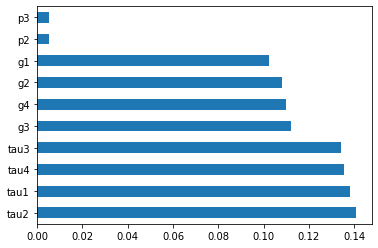

In [45]:
#plot graph of feature importance
feat_importance = pd.Series(rsmodel.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()